In [2]:
## import all the necessary libraries
import warnings

#Ignoring unnecessory warnings
warnings.filterwarnings("ignore")                   
import pandas as pd
import numpy as np


In [205]:
##reading dataset
df = pd.read_csv('/home/thuy/Amazon_usecase/Reviews.csv')
#df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [206]:
#df.columns

### Data Preparation

In [207]:
### add some columns for upvote metrics
df['Helpful%'] = np.where(df['HelpfulnessDenominator'] > 0, df['HelpfulnessNumerator']/df['HelpfulnessDenominator'], -1)

In [208]:
#df.head()

In [209]:
#df['Helpful%'].unique()

#### assigning different different labels to helpful% according to its value

In [228]:
df['%upvote']  = pd.cut( df['Helpful%'], bins = [-1, 0, 0.2, 0.4, 0.6, 0.8, 1] , labels=['Empty', '0-20%', '20-40%', '40-60%', '60-80%', '80-100%'])

In [229]:
 df.groupby(['Score','%upvote']).agg('count')

Id  ProductId  UserId  ProfileName  HelpfulnessNumerator  \
Score %upvote                                                                 
1     Empty      8060       8060    8060         8060                  8060   
      0-20%      2338       2338    2338         2338                  2338   
      20-40%     4649       4649    4649         4649                  4649   
      40-60%     6586       6586    6586         6586                  6586   
      60-80%     5838       5838    5838         5836                  5838   
      80-100%   12531      12531   12531        12531                 12531   
2     Empty      4234       4234    4234         4234                  4234   
      0-20%       762        762     762          762                   762   
      20-40%     1618       1618    1618         1618                  1618   
      40-60%     3051       3051    3051         3051                  3051   
      60-80%     2486       2486    2486         2486                  2486   
      80-100%    7014       7014    7014         7014                  7014   
3     Empty      5062       5062    5062         5062                  5062   
      0-20%       474        474     474          474                   474   
      20-40%     1506       1506    1506         1506                  1506   
      40-60%     3384       3384    3384         3384                  3384   
      60-80%     2754       2754    2754         2754                  2754   
      80-100%   11037      11037   11037        11037                 11037   
4     Empty      4780       4780    4780         4780                  4780   
      0-20%       116        116     116          116                   116   
      20-40%      909        909     909          909                   909   
      40-60%     3185       3185    3185         3185                  3185   
      60-80%     2941       2941    2941         2941                  2941   
      80-100%   26707      26707   26707        26707                 26707   
5     Empty     11638      11638   11638        11638                 11638   
      0-20%       432        432     432          432                   432   
      20-40%     2275       2275    2275         2275                  2275   
      40-60%    10312      10312   10312        10312                 10312   
      60-80%    11060      11060   11060        11060                 11060   
      80-100%  140661     140661  140661       140659                140661   

               HelpfulnessDenominator    Time  Summary    Text  Helpful%  
Score %upvote                                                             
1     Empty                      8060    8060     8060    8060      8060  
      0-20%                      2338    2338     2338    2338      2338  
      20-40%                     4649    4649     4649    4649      4649  
      40-60%                     6586    6586     6586    6586      6586  
      60-80%                     5838    5838     5838    5838      5838  
      80-100%                   12531   12531    12531   12531     12531  
2     Empty                      4234    4234     4234    4234      4234  
      0-20%                       762     762      737     762       762  
      20-40%                     1618    1618     1618    1618      1618  
      40-60%                     3051    3051     3051    3051      3051  
      60-80%                     2486    2486     2486    2486      2486  
      80-100%                    7014    7014     7014    7014      7014  
3     Empty                      5062    5062     5062    5062      5062  
      0-20%                       474     474      474     474       474  
      20-40%                     1506    1506     1506    1506      1506  
      40-60%                     3384    3384     3384    3384      3384  
      60-80%                     2754    2754     2754    2754      2754  
      80-100%                   11037   11037    11036   11037   

In [230]:
df_s = df.groupby(['Score','%upvote']).agg({'Id':'count'}).reset_index()


In [213]:
#df_s

In [214]:
pivot = df_s.pivot(index = '%upvote', columns = 'Score')

In [215]:
pivot

Id                            
Score        1     2      3      4       5
%upvote                                   
Empty     8060  4234   5062   4780   11638
0-20%     2338   762    474    116     432
20-40%    4649  1618   1506    909    2275
40-60%    6586  3051   3384   3185   10312
60-80%    5838  2486   2754   2941   11060
80-100%  12531  7014  11037  26707  140661

#### create heatmap of it,for better Visualisations

Text(0.5, 1.0, 'How helpful users find among user scores')

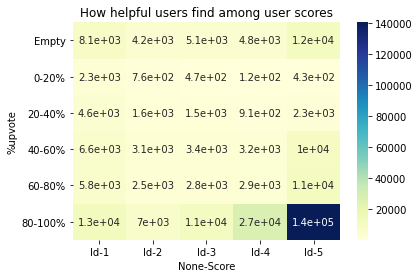

In [231]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(pivot, annot=True, cmap= 'YlGnBu')
plt.title('How helpful users find among user scores')

## ***Data cleaning***
Because, the score == 3 has no meaning for prediction (Neutral), then we need to delete in from the dataframe

In [217]:
# Check all the values in score
df['Score'].unique()

array([5, 1, 4, 2, 3])

In [218]:
filtered_neutral_df  = df[df['Score']!=3]

## ***Decide the independence and dependence variables***
The text column is decide the score in this data frame
In other words, I am going to predict the score based on the text

In [232]:
#Fit the Text in X
X = filtered_neutral_df['Text']

In [233]:
#Map the Score into 2 class in which, the scores < 3 belong to class 0, the scores > 3 belong to class 1
y_dict = {1:0, 2:0, 4:1, 5:1}
y = filtered_neutral_df['Score'].map(y_dict)

## ***Difine the training and testing function***

In [234]:
def  text_fit(X, y, nlp_model, ml_model, coef_show =1):
    X_c = nlp_model.fit_transform(X)
    print('features: :{}'.format(X_c.shape[1]) )
    X_train, X_test, Y_train, Y_test = train_test_split(X_c, y)
    ml  = ml_model.fit(X_train, Y_train)
    acc = ml.score(X_test, Y_test)
    if coef_show ==1:
        w = c.get_feature_names()
        coef = ml.coef_.tolist()[0]
        ceof_df = pd.DataFrame({'Word':w, 'Coefficent':coef})
        print('Top 10 positive words')
        print(coef_df.head(10))
        print('Top 10 negative words')
        print(coef_df.tail(10))
    return X_test,Y_test, ml
    

In [235]:
from sklearn.metrics import confusion_matrix, accuracy_score
def prediction(X_test,Y_test,ml):
    predictions = ml.predict(X_test)
    cn = confusion_matrix(predictions, Y_test)
    print(cn)
    acc = accuracy_score(predictions, Y_test)
    print(acc)

In [236]:
countVector = CountVectorizer(stop_words='english')

In [237]:
lgMod = LogisticRegression()

## ***Buid three prediction models***
### CountVectorizer and Logistic regression, CountVectorizer and DummyClassifier, IF-IDF and Logistic Regression
### Draw the ROC, AUC cuver

### CountVectorizer and Logistic regression

In [238]:
X_test_countVec_lm,Y_test_countVec_lm, countVecml = text_fit(X, y, countVector,lgMod ,0)

features: :114969


In [239]:
prediction(X_test_countVec_lm, Y_test_countVec_lm, countVecml)

[[ 14934   2766]
 [  5484 108270]]
0.9372404034871514


### CountVectorizer and DummyClassifier

In [125]:
### calling function for dummy classifier 
from sklearn.dummy import DummyClassifier
X_test_counVec_dummy, Y_test_countVec_dummy, dummyMod = text_fit(X, y, CountVectorizer, DummyClassifier(),0)

 ### IF-IDF and Logistic Regression

In [127]:
#### Logistic regression model on TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
X_test_tfidf,Y_test_tfidf, tfidf_ml = text_fit(X, y,tfidf, LogisticRegression(),0)


In [131]:
prediction(X_test_tfidf,Y_test_tfidf, tfidf_ml)


[[ 14207   2302]
 [  6287 108658]]
0.9346615546122597


### ROC-AUC curves

In [ ]:
import sklearn.metrics as metrics
def AUC_ROC(X_test, Y_test):
    probs = ml.predict_proba(X_test)
    preds  = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    auc = metrics.roc_auc_score(Y_test, preds)
    print('AUC: %.3f' % auc)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [ ]:
AUC_ROC(X_test_countVec_lm, Y_test_countVec_lm)

## Upvote prediction 
### The prediction for only 5 reviews and not include the neutral votes


In [132]:
df.head()

,fpr,tpr
0,0.000000,0.000000
1,0.000000,0.000424
2,0.000000,0.000514
3,0.000000,0.000550
4,0.000097,0.000631


In [27]:
filter_df = df[df['Score']==5]

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'Helpful %', '%upvote'],
      dtype='object')

In [ ]:
filter_df.head()

In [31]:
filter_df['%upvote'].unique()
data = filter_df[filter_df['%upvote'].isin(['80-100%', '60-80%', '20-40%', '0-20%'])]

1.0    151721
0.0      2707
Name: %upvote, dtype: int64


In [ ]:
X = data['Text']
data['%upvote'].unique()

In [ ]:
y_dict = {'80-100%':1, '60-80%':1, '20-40%':0, '0-20%':0}
y = data['%upvote'].map(y_dict)
y.value_counts()

In [ ]:
X_test, Y_test, ml = text_fit(X, y, tfidf, LogisticRegression(), 0)

#### The target class 'y' is highly skewed , we will observe positive upvotes are too much higher than negative ones.
    Let's resample the data to get balanced data:

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [184]:
tf=TfidfVectorizer()

In [185]:
X_c=tf.fit_transform(X)

In [186]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_c,y,train_size=0.7)

In [187]:
y_test.value_counts()

1.0    45514
0.0      815
Name: %upvote, dtype: int64

In [188]:
## RandomOverSampler to handle imbalanced data

from imblearn.over_sampling import RandomOverSampler

In [189]:
os =  RandomOverSampler()

In [191]:
X_train_res, y_train_res = os.fit_resample(X_c, y)

In [192]:
X_train_res.shape,y_train_res.shape

((303442, 67507), (303442,))

In [193]:
from collections import Counter

In [194]:
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_train_res)))

Original dataset shape Counter({1.0: 151721, 0.0: 2707})
Resampled dataset shape Counter({1.0: 151721, 0.0: 151721})


In [58]:
from sklearn.linear_model import LogisticRegression

In [198]:
np.arange(-2,3)

array([-2, -1,  0,  1,  2])

In [201]:
log_class=LogisticRegression()

In [202]:
grid = {'C':10.0**np.arange(-2,3), 'penalty':['l1','l2']}

In [197]:
import numpy as np
from sklearn.model_selection import GridSearchCV

In [203]:

clf=GridSearchCV(estimator=log_class,param_grid=grid,cv=5,n_jobs=-1,scoring='f1_macro')
clf.fit(X_train_res,y_train_res)

/home/thuy/anaconda3/envs/data_env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/thuy/anaconda3/envs/data_env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/thuy/anaconda3/envs/data_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/thuy/anaconda3/envs/data_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this t

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [204]:
y_pred=clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[  815     0]
 [  717 44797]]
0.9845237324354076
